# モルフォロジー演算
### モルフォロジー演算は膨張と収縮からなる
- モルフォロジー演算を使うことで、ものを分離したり、ノイズを消せる

#### モルフォロジー演算は膨張と収縮からなる
- erode(ヘロド) -> 収縮
  - ２つの図形が分離
  - 本来であれば、分離されているはずだがノイズで繋がってしまっている場合に使用する
- 元画像
  - ２つの図形を連結する細い線
- dilate(ディレーと) -> 膨張
  - ２つの図形がより一体化

In [7]:
import cv2
import numpy as np

In [8]:
img = cv2.imread("data/src/floor.jpg",)

In [9]:
# モルフォロジー演算をするためには、画像が２値化されている必要がある : 白か黒どちらかに分けるというように画像にメリハリをつける
ret, img_th = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)
cv2.imshow("img", img_th)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 2値化

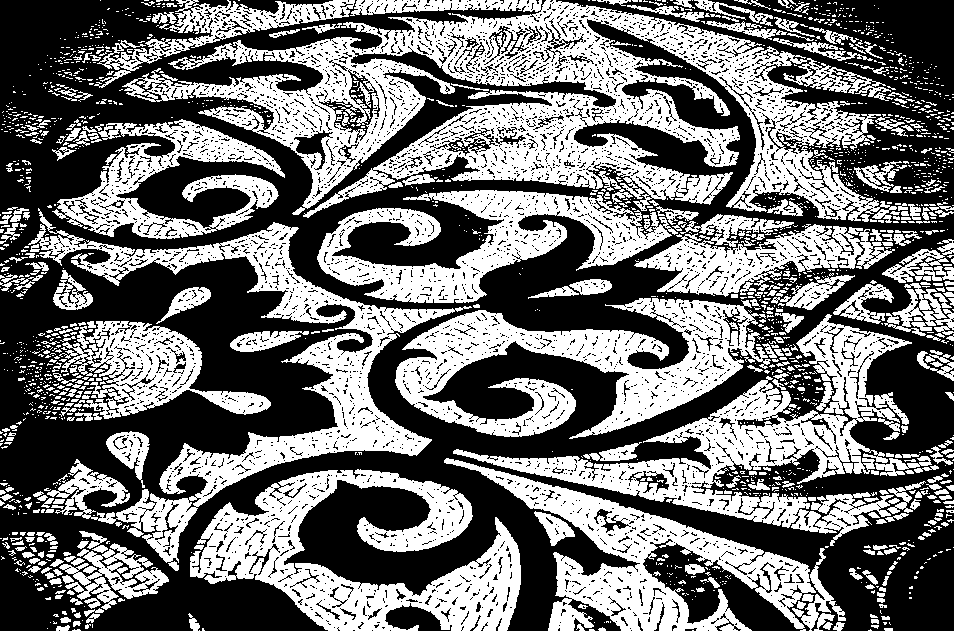

### モルフォロジー演算には kernel も必要になってくる
- 自分が中心となってその周り８近傍の着目画素を黒にするか、白にするか
- 例）
    - 白い画素があれば、膨張の場合着目画素も白にする
    - 黒い画素があれば、収縮の場合着目画素も黒くする
    
#### どの領域で探すかが　kernel(カーネル)

In [10]:
# モルフォロジー演算には kernel も必要になってくる -> 膨張した画像・収縮した画像を作成
kernel = np.ones((3, 3), dtype=np.uint8)
img_d = cv2.dilate(img_th, kernel)  # 膨張
img_e = cv2.erode(img_th, kernel)   # 収縮

In [11]:
cv2.imshow("img", img_th)
cv2.imshow("d", img_d)
cv2.imshow("e", img_e)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### floor img

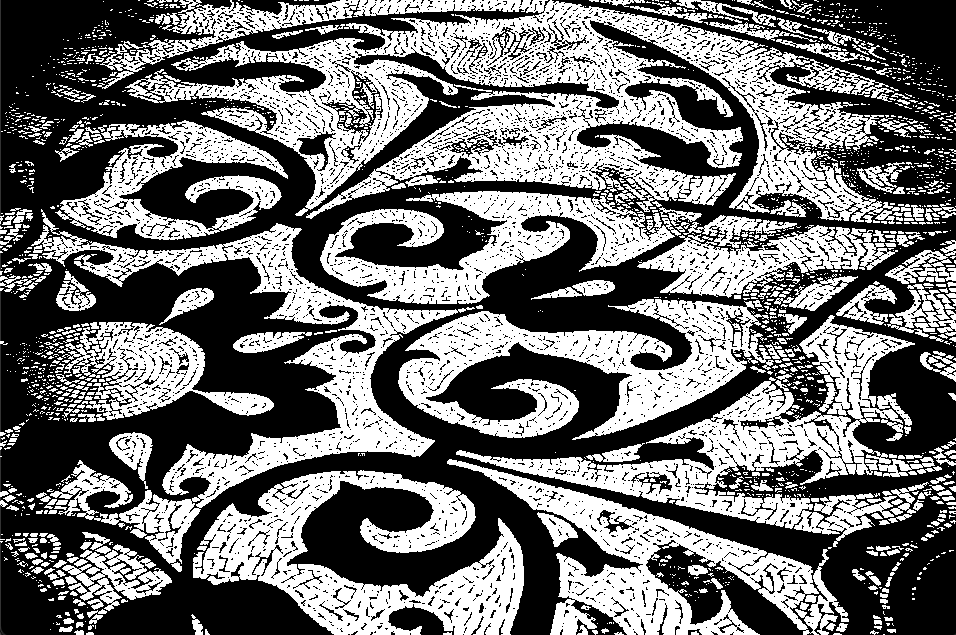

### floor d

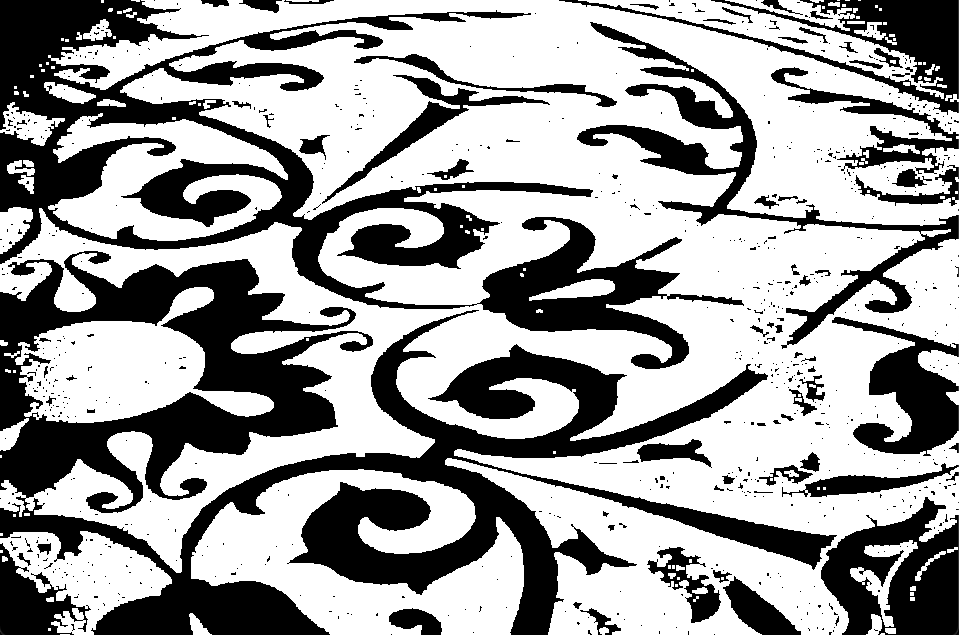

### floor e

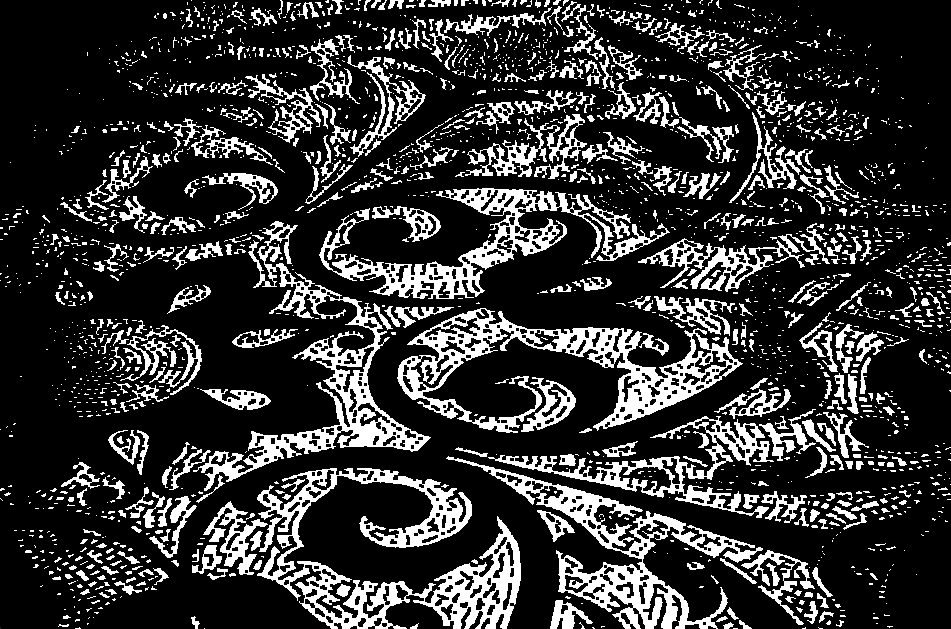

#### dilate (ディレート)：膨張
- dilate した場合は、白い部分が膨張してくるので線画白で塗りつぶされて幾何学模様だけを抽出させる

#### erode (ヘロド)：収縮
- erode した場合は、白が削られて周りの黒に染められて穴が空いたような画像が抽出される

### 膨張・収縮を組み合わせたモノをオープニング・クロージングという

In [6]:
# クロージング
img_c = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, kernel)

cv2.imshow("d", img_d)
cv2.imshow("e", img_c)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### floor dilate

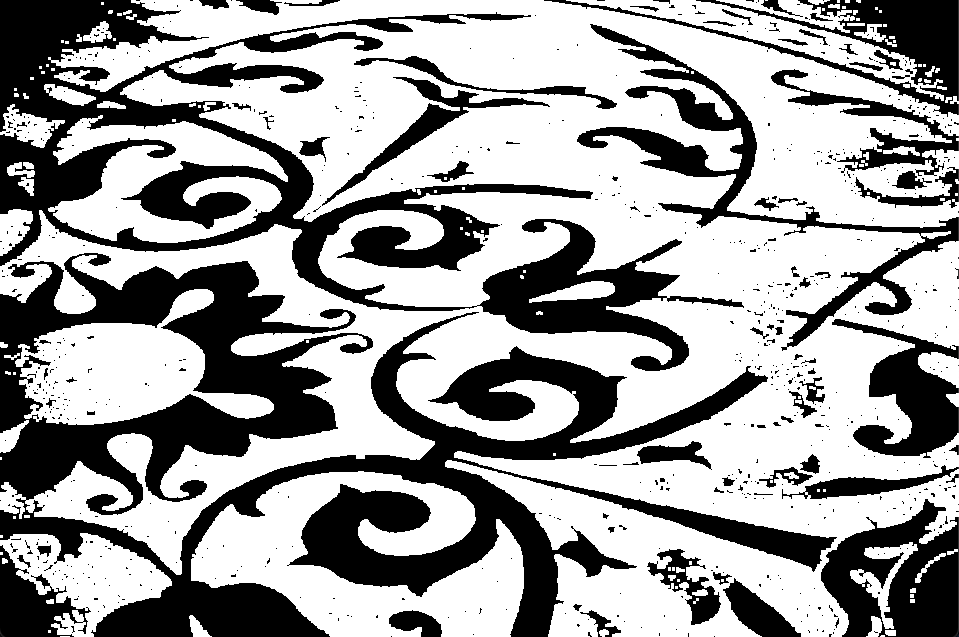

### floor erode

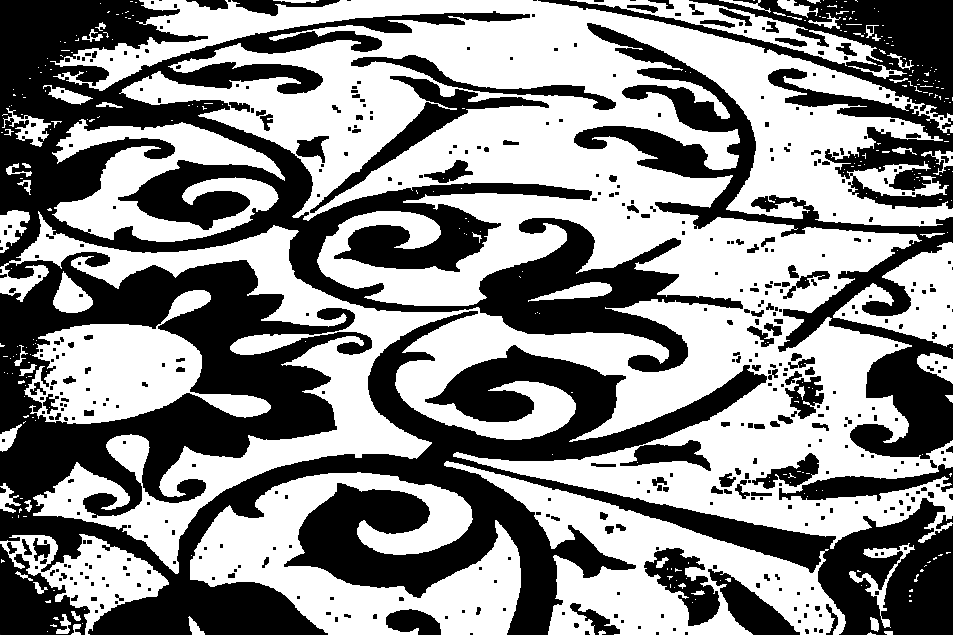

#### クロージング
- 膨張 -> 収縮　
    - 膨張でノイズは消す。その後に収縮して空いた穴を塞ぐので元の形を保ちやすい
    - なるべく元の幾何学的な模様を反映しようと処理する